In [16]:
from . import h5
import numpy as np
import matplotlib.pyplot as pp

import datajoint as dj
from pipeline import reso
import matplotlib.pyplot as pp


ImportError: cannot import name 'h5'

In [5]:
data=h5.readephys('oneCell10_0.h5')

NameError: name 'h5' is not defined

In [6]:
data['settings']

NameError: name 'data' is not defined

In [7]:
patchcell={}
patchcell['depth']=190
patchcell['power']=60

vt = h5.ts2sec(data['ts'])
vm=data['v1']
peaks=(np.diff(data['scanImage']))
peaks2=np.argwhere((np.diff(data['scanImage'])) > 2.495)
# pp.plot(peaks,'.')
# print(len(peaks))
# print(len(peaks2))
ft=vt[peaks2]
# pp.plot(ft)

patchcell['frametimes']=ft
patchcell['ephystimes']=vt
patchcell['vm']=vm*1000



NameError: name 'h5' is not defined

In [1]:
patchcell['trace']=(reso.Fluorescence.Trace & {'animal_id': '20053','session': '3','scan_idx': '1','mask_id': 1}).fetch('trace')[0]
patchcell['trace'].shape
fig=pp.figure(figsize=(50,20))
pp.plot(patchcell['ephystimes'],patchcell['vm']*10,alpha=0.8)
pp.plot(patchcell['frametimes'],patchcell['trace']-20,alpha=0.8)
pp.scatter(patchcell['ephystimes'][firstspkindex],patchcell['vm'][firstspkindex]*10,color = 'r',s=10)

NameError: name 'reso' is not defined

In [80]:
spkindex = np.argwhere(patchcell['vm']>1.1).transpose()[0]
# spkindex=np.asarray([1,2,3,7,8,9,11,13,14,15,17,19])
firstspkindex=[]
count=0
memory=-1
while count<len(spkindex):
    if spkindex[count]>memory+1:
        firstspkindex.append(spkindex[count])
        memory=spkindex[count]
        count+=1
    else:
        memory=spkindex[count]
        count+=1


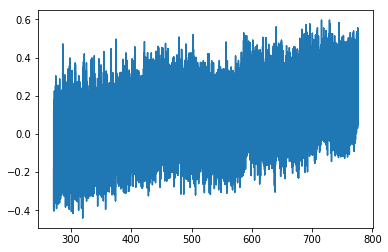

In [82]:
# pp.plot(patchcell['frametimes'],(patchcell['trace']/-85)+1,alpha=0.8)
# # pp.plot(patchcell['ephystimes'][firstspkindex])

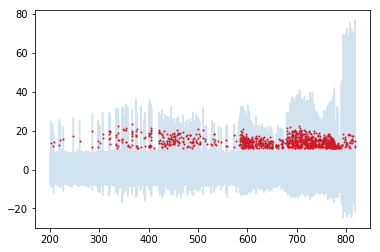

In [108]:
pp.scatter(patchcell['ephystimes'][firstspkindex],patchcell['vm'][firstspkindex]*10,color = 'r',s=1)
pp.plot(patchcell['ephystimes'],patchcell['vm']*10,alpha=0.2)

In [114]:
patchcell['vm']

array([-0.34112798, -0.22127766,  0.00244294, ..., -0.19331258,
       -0.08145228, -0.06547224])